In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataCleaned_forPrice_20210724.csv', index_col=0, encoding='utf-8')
df.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,HOT,NaN,NaN
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,HOT,NaN,NaN
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,HOT,NaN,NaN
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,HOT,NaN,NaN
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,HOT,NaN,NaN


# data clean

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85850 entries, 0 to 85849
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_brand           85850 non-null  object 
 1   car_model           85850 non-null  object 
 2   car_year            85850 non-null  float64
 3   car_mileage         85850 non-null  float64
 4   car_price           85850 non-null  float64
 5   car_color           84691 non-null  object 
 6   car_cylinderVolume  85850 non-null  float64
 7   car_driveMode       83564 non-null  float64
 8   car_fuel            72835 non-null  object 
 9   car_gear            85495 non-null  object 
 10  verified            83365 non-null  float64
 11  source              85850 non-null  object 
 12  car_door            50341 non-null  float64
 13  car_seat            77261 non-null  float64
dtypes: float64(8), object(6)
memory usage: 9.8+ MB


In [ ]:
df.describe()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat
count,85850.000000,8.585000e+04,8.585000e+04,8.585000e+04,83564.000000,83365.000000,50341.000000,77261.000000
mean,2013.516016,2.119831e+05,6.785117e+05,2.402985e+03,2.310516,0.258370,4.369679,5.001411
std,4.507971,1.316102e+07,9.147950e+06,9.905071e+04,0.724306,0.437741,0.871095,0.870110
min,1967.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.300000e+04,2.480000e+05,1.600000e+03,2.000000,0.000000,4.000000,5.000000
50%,2014.000000,8.000000e+04,4.180000e+05,2.000000e+03,2.000000,0.000000,5.000000,5.000000
75%,2017.000000,1.264822e+05,7.550000e+05,2.200000e+03,2.000000,1.000000,5.000000,5.000000
max,2022.000000,2.147484e+09,1.980000e+09,2.902180e+07,4.000000,1.000000,6.000000,12.000000


In [ ]:
#delete the data that price<=10000
indexNames = df[df['car_price']<=10000].index
df.drop(indexNames , inplace=True)
df.shape

(79958, 14)

In [ ]:
#delete the data that price>8000000
df = df[df['car_price']<=8000000]
df.shape

(79816, 14)

In [ ]:
# replace brand_name 中華 to CMC
df.loc[df['car_brand'].str.contains('中華') == True, 'car_brand'] = 'CMC'

In [ ]:
df.loc[df['car_brand'].str.contains('BENZ') == True, 'car_brand'] = 'BENZ'
df.loc[df['car_brand'].str.contains('VOLKSWAGEN') == True, 'car_brand'] = 'VW'

In [ ]:
# 看是否有空值
df.isnull().any()

car_brand             False
car_model             False
car_year              False
car_mileage           False
car_price             False
car_color              True
car_cylinderVolume    False
car_driveMode          True
car_fuel               True
car_gear               True
verified               True
source                False
car_door               True
car_seat               True
dtype: bool

In [ ]:
# 空值用眾數填充
df_new = df
df_new['car_color'] = df_new['car_color'].fillna(df_new['car_color'].mode()[0])
df_new['car_driveMode'] = df_new['car_driveMode'].fillna(df_new['car_driveMode'].mode()[0])
df_new['car_fuel'] = df_new['car_fuel'].fillna(df_new['car_fuel'].mode()[0])
df_new['car_gear'] = df_new['car_gear'].fillna(df_new['car_gear'].mode()[0])
df_new['verified'] = df_new['verified'].fillna(df_new['verified'].mode()[0])
df_new['car_door'] = df_new['car_door'].fillna(df_new['car_door'].mode()[0])
df_new['car_seat'] = df_new['car_seat'].fillna(df_new['car_seat'].mode()[0])

In [ ]:
# 檢查是否有空值
df_new.isnull().any().any()

False

In [ ]:
#看各品牌有多少不重複車款
#pd.set_option('display.max_rows', 100)
#df_new.groupby(['car_brand'])['car_model'].nunique()

car_brand
ACURA             5
ALFA ROMEO       10
ASIA              1
ASTON MARTIN      2
AUDI            256
AUSTIN            1
BENTLEY          11
BENZ            703
BMW             669
BUICK             6
CADILLAC          5
CHEVROLET         7
CHRYSLER          4
CITROEN           6
CMC              35
DAIHATSU         16
DFSK              8
DODGE             5
FERRARI           5
FIAT              6
FORD            230
FORMOSA           2
FOTON             1
HINO              3
HONDA           121
HUMMER            2
HYUNDAI         182
INFINITI         70
ISUZU            10
IVECO             3
JAGUAR           43
JEEP              8
KIA              44
LAMBORGHINI       4
LAND              5
LAND ROVER       43
LEXUS           228
LUXGEN          143
MAHINDRA          5
MASERATI         35
MAZDA           201
MCC               1
MCLAREN           4
MG                1
MINI             91
MITSUBISHI      231
NISSAN          229
OPEL              7
PEUGEOT          72
PORSCHE   

# data exploration

In [ ]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,HOT,5.0,5.0
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,HOT,5.0,5.0
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,HOT,5.0,5.0
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0


In [ ]:
df_new['car_price'].describe()

count    7.981600e+04
mean     6.593040e+05
std      6.261560e+05
min      1.500000e+04
25%      2.800000e+05
50%      4.500000e+05
75%      7.890000e+05
max      8.000000e+06
Name: car_price, dtype: float64

In [ ]:
df_new['car_brand'].describe()

count      79816
unique        65
top       TOYOTA
freq       13416
Name: car_brand, dtype: object

In [ ]:
#data is not balance
pd.set_option('display.max_rows', 100)
df_new['car_brand'].value_counts()

TOYOTA          13416
BENZ            10088
BMW              7951
MITSUBISHI       5357
HONDA            5351
NISSAN           5224
MAZDA            5155
FORD             4976
VW               3362
HYUNDAI          2999
LUXGEN           2712
LEXUS            2531
AUDI             2024
SUZUKI           1753
PORSCHE          1093
VOLVO             944
SUBARU            816
CMC               692
MINI              612
SKODA             505
INFINITI          492
MASERATI          216
PEUGEOT           210
KIA               209
LAND ROVER        135
ISUZU             132
JAGUAR            121
SMART             109
HINO               81
DAIHATSU           70
BENTLEY            55
SAAB               47
PROTON             35
ALFA ROMEO         35
DFSK               32
TOBE               27
TESLA              24
CHEVROLET          21
SSANGYONG          21
MAHINDRA           15
CHRYSLER           15
FIAT               15
OPEL               14
JEEP               13
CITROEN            11
FERRARI   

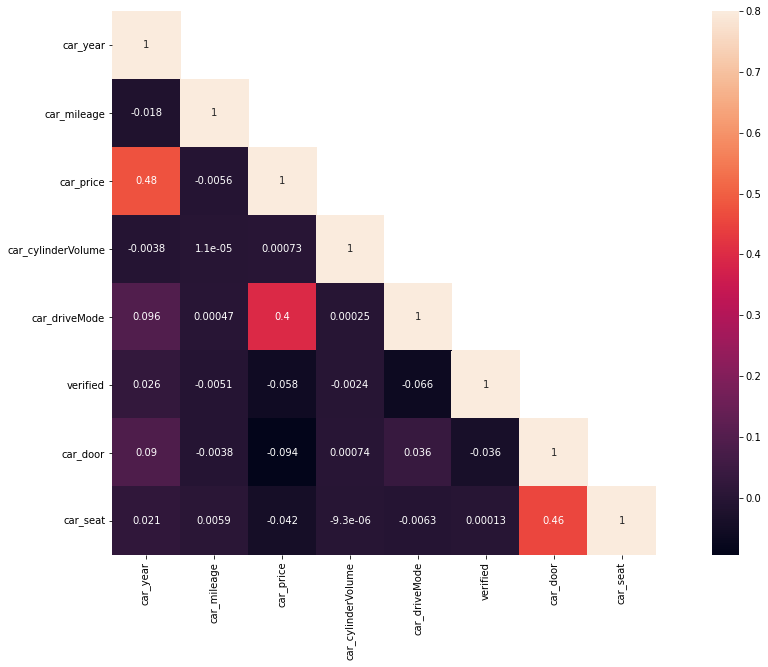

In [ ]:
#相關係數低，且有認證車子竟然相關係數為負?
corrMat = df_new[['car_brand', 'car_model', 'car_year', 'car_mileage', 'car_price',
       'car_color', 'car_cylinderVolume', 'car_driveMode', 'car_fuel',
       'car_gear', 'verified', 'source', 'car_door', 'car_seat']].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

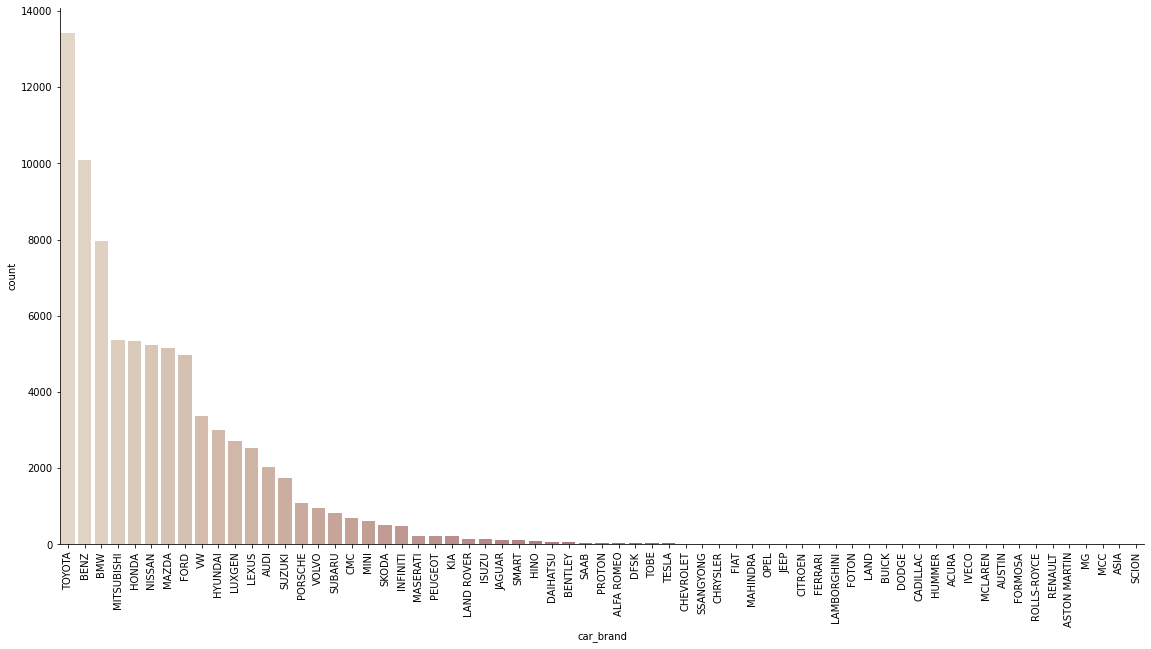

In [ ]:
#車子品牌分布不均(多為toyota)
var = "car_brand"
#plt.figure(figsize=(20, 10))
plot_order = df_new.groupby('car_brand')['car_price'].count().sort_values(ascending=False).index.values
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_new, order=plot_order);
plt.xticks(rotation=90);

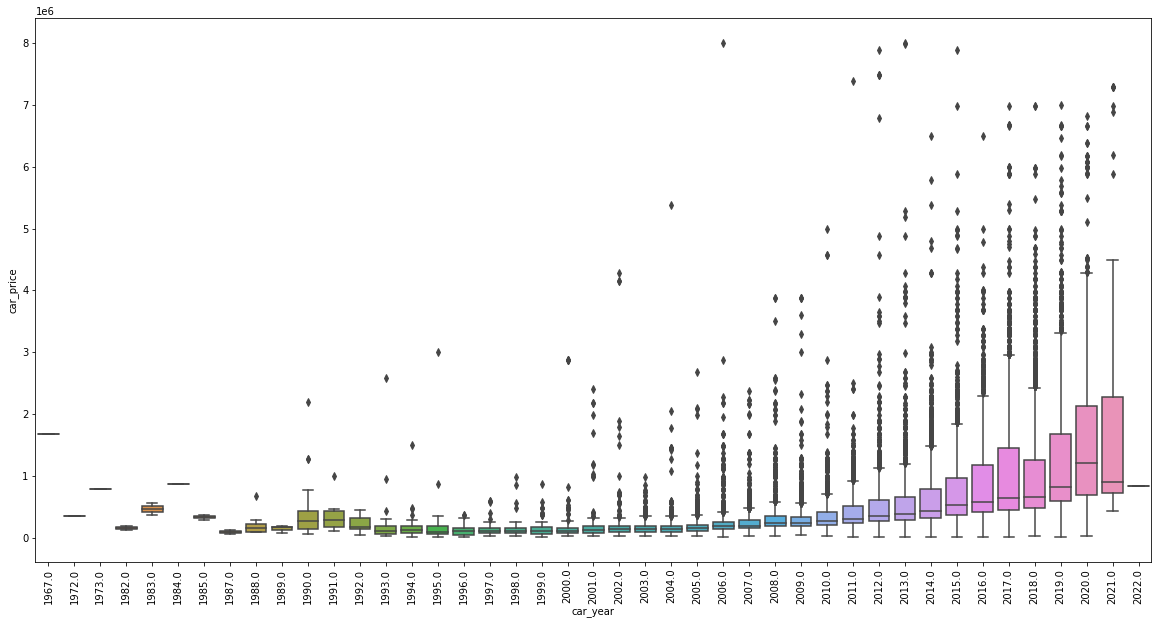

In [ ]:
#各車款皆有偏離很大之離群值(是否該刪除?)
var = 'car_year'
data = pd.concat([df_new['car_price'], df_new[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="car_price", data=data.sort_values('car_price',ascending=False))
#fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

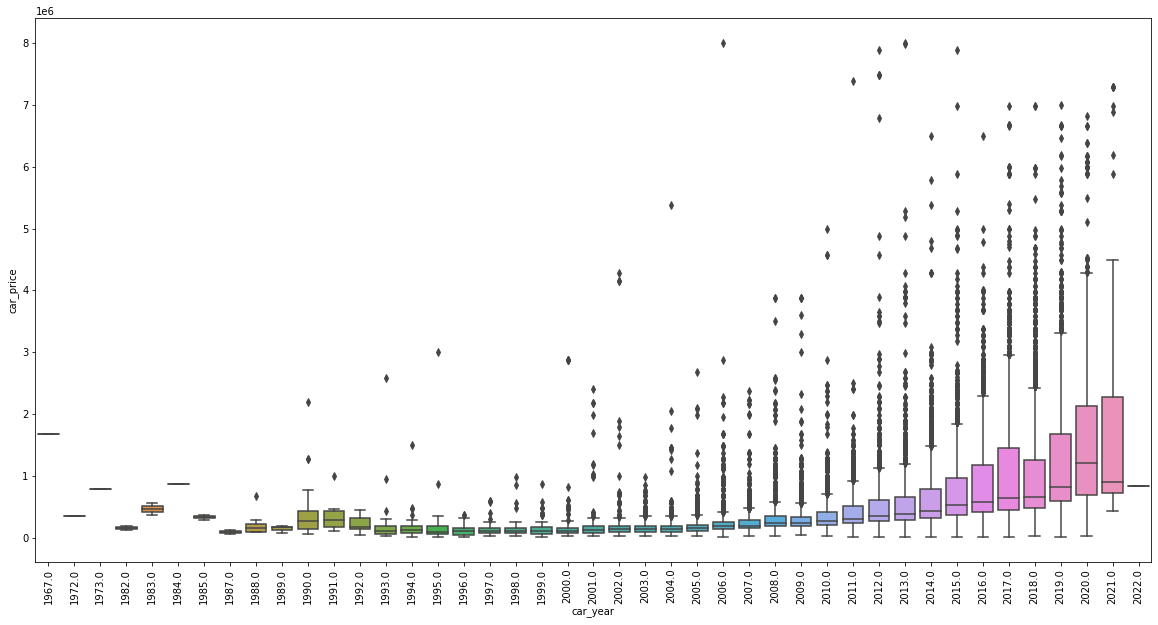

In [ ]:
#各年份皆有偏離很大之離群值(是否該刪除?)
var = 'car_year'
data = pd.concat([df_new['car_price'], df_new[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="car_price", data=data)
#fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

In [ ]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,HOT,5.0,5.0
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,HOT,5.0,5.0
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,HOT,5.0,5.0
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0


In [ ]:
#待考量要不要把車型放進去
# pd.set_option('display.max_rows', 100)
# k = df_new['car_model'].value_counts()>50
# print(k[k==True])
#indexNames = df[df['car_price']<=10000].index
#df.drop(indexNames , inplace=True)
#df.shape

NameError: ignored

# data engineering

In [ ]:
#normalize the data
#不確定car_driveMode	car_door	car_seat要不要被normalize(有次序之分?)
from sklearn import preprocessing
df_new['car_year'] = preprocessing.scale(df_new['car_year'])
df_new['car_mileage'] = preprocessing.scale(df_new['car_mileage'])
df_new['car_cylinderVolume'] = preprocessing.scale(df_new['car_cylinderVolume'])

df_new['car_driveMode'] = preprocessing.scale(df_new['car_driveMode'])
df_new['car_door'] = preprocessing.scale(df_new['car_door'])
df_new['car_seat'] = preprocessing.scale(df_new['car_seat'])

In [ ]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat
0,TOYOTA,ALTIS,-0.968796,-0.001148,196000.0,黑,-0.005784,-0.390314,汽油,手自排,1.0,HOT,0.481971,-0.018203
1,MITSUBISHI,DELICA,0.591087,-0.009879,358000.0,深藍,0.000057,-0.390314,汽油,手排,1.0,HOT,0.481971,-0.018203
2,SUZUKI,CARRY,-0.077434,-0.012018,286000.0,銀,-0.007730,-0.390314,汽油,手排,1.0,HOT,0.481971,-0.018203
3,NISSAN,MARCH,-0.077434,-0.009041,238000.0,淺綠,-0.008704,-0.390314,汽油,自排,1.0,HOT,0.481971,-0.018203
4,NISSAN,SENTRA,0.368247,-0.012759,378000.0,白,-0.005784,-0.390314,汽油,手自排,1.0,HOT,0.481971,-0.018203


skew:  2.838526496056192


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


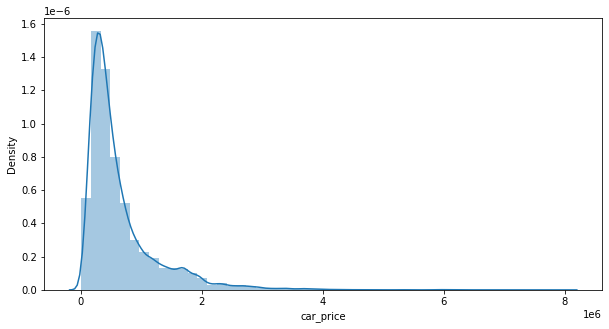

In [ ]:
#右偏→要取log變成正態分布  #normalize the data?
plt.figure(figsize = (10,5))
print("skew: ",df_new['car_price'].skew())
sns.distplot(df_new['car_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


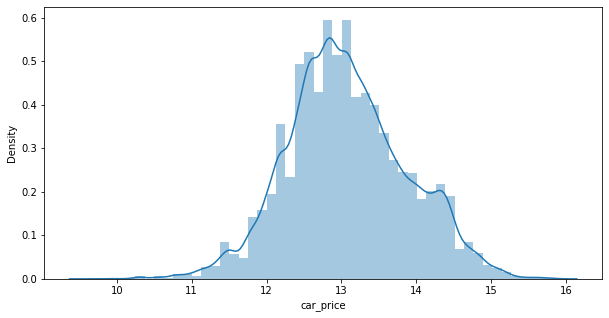

In [ ]:
target = np.log(df_new['car_price'])
plt.figure(figsize = (10,5))
sns.distplot(target)
df_new['car_price'] = target

In [ ]:
df2 = df_new.drop(['source'], axis=1)
df2.head()
df_dummy = pd.get_dummies(df2)
df_dummy.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,car_color_魂動紅,car_color_黃,car_color_黃深棕,car_color_黃白,car_color_黃黑,car_color_黑,car_color_黑 深紅,car_color_黑 灰,car_color_黑.深紅,car_color_黑.紅,car_color_黑曜藍,car_color_黑灰,car_color_黑灰雙,car_color_黑爵黑,car_color_黑白,car_color_黑紅,car_color_黑紫,car_color_黑藍,car_color_黑銀,car_color_黑鐵灰,car_fuel_0,car_fuel_12V輕油電柴油,car_fuel_48V輕油電,car_fuel_48V輕油電柴油,car_fuel_Hybrid 混合動力,car_fuel_插電式油電,car_fuel_未填寫,car_fuel_柴油,car_fuel_柴電複合,car_fuel_汽油,car_fuel_油電,car_fuel_油電複合,car_fuel_瓦斯雙燃料,car_fuel_純電,car_fuel_電動,car_gear_CVT 無段變速,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排
0,-0.968796,-0.001148,12.185870,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.591087,-0.009879,12.788288,0.000057,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,-0.077434,-0.012018,12.563747,-0.007730,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,-0.077434,-0.009041,12.380026,-0.008704,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.368247,-0.012759,12.842649,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_dummy.shape

(79816, 5262)

In [ ]:
# 檢查是否有空值
# pd.set_option('display.max_rows', None)
df_dummy.isnull().any().any()

False

In [ ]:
#填補空值
# 空值用眾數填充
# df_dummy['car_driveMode'] = df_dummy['car_driveMode'].fillna(df_dummy['car_driveMode'].mode()[0])
# df_dummy['verified'] = df_dummy['verified'].fillna(df_dummy['verified'].mode()[0])
# df_dummy['car_door'] = df_dummy['car_door'].fillna(df_dummy['car_door'].mode()[0])
# df_dummy['car_seat'] = df_dummy['car_seat'].fillna(df_dummy['car_seat'].mode()[0])

# modeling

In [ ]:
#slc把價格去掉
slc = list(range(df_dummy.shape[1]))
slc.remove(2)

X = df_dummy.iloc[:, slc]
X.shape

(79816, 5261)

In [ ]:
X.head()

,car_year,car_mileage,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,car_brand_KIA,...,car_color_魂動紅,car_color_黃,car_color_黃深棕,car_color_黃白,car_color_黃黑,car_color_黑,car_color_黑 深紅,car_color_黑 灰,car_color_黑.深紅,car_color_黑.紅,car_color_黑曜藍,car_color_黑灰,car_color_黑灰雙,car_color_黑爵黑,car_color_黑白,car_color_黑紅,car_color_黑紫,car_color_黑藍,car_color_黑銀,car_color_黑鐵灰,car_fuel_0,car_fuel_12V輕油電柴油,car_fuel_48V輕油電,car_fuel_48V輕油電柴油,car_fuel_Hybrid 混合動力,car_fuel_插電式油電,car_fuel_未填寫,car_fuel_柴油,car_fuel_柴電複合,car_fuel_汽油,car_fuel_油電,car_fuel_油電複合,car_fuel_瓦斯雙燃料,car_fuel_純電,car_fuel_電動,car_gear_CVT 無段變速,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排
0,-0.968796,-0.001148,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.591087,-0.009879,0.000057,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,-0.077434,-0.012018,-0.007730,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,-0.077434,-0.009041,-0.008704,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.368247,-0.012759,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df_dummy.loc[:,['car_price']]
print(y.shape)
y.head()

(79816, 1)


,car_price
0,12.185870
1,12.788288
2,12.563747
3,12.380026
4,12.842649


In [ ]:
#PCA降維度
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [ ]:
from sklearn.decomposition import PCA
#first of all, fit the data using pca
pca2 = PCA(30)
data2 = pca2.fit_transform(X)

In [ ]:
#secondly, decide features based on the variance
pca2.explained_variance_ratio_

array([0.15418022, 0.11732998, 0.10353723, 0.10343464, 0.09551556,
       0.05745504, 0.03523856, 0.02894713, 0.02280122, 0.01708198,
       0.01613991, 0.01415905, 0.01331916, 0.01199268, 0.01084116,
       0.01007589, 0.00830077, 0.00746665, 0.00715791, 0.00675107,
       0.00669398, 0.00559233, 0.00454232, 0.00419886, 0.00408673,
       0.00392753, 0.00366417, 0.00341823, 0.00271391, 0.00236716])

Text(0, 0.5, 'Cumulated Explained Variance')

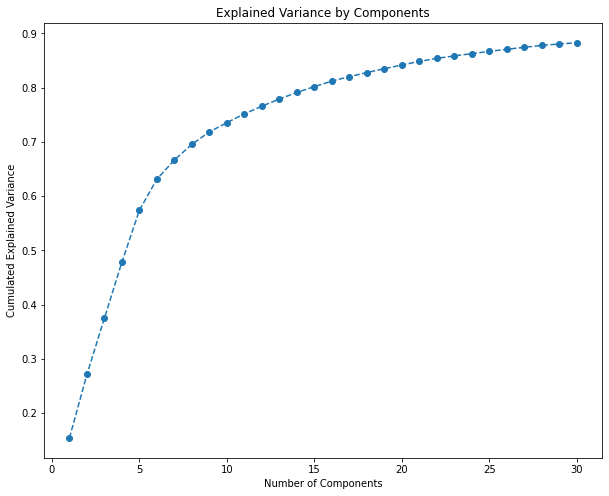

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,31), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Explained Variance")

In [ ]:
#choose 30 componets based on the graph
pca = PCA(n_components = 30)

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.transform(X)

array([[-1.56959850e-01,  9.62733811e-01, -3.92405405e-02, ...,
        -4.10673032e-03, -1.72243658e-02,  2.73717356e-02],
       [-2.61068530e-01, -3.29504706e-02, -1.18744019e-01, ...,
         5.12219726e-01, -3.09854185e-04, -8.72111275e-02],
       [-1.77265489e-01,  4.66820260e-01, -8.97460953e-02, ...,
         6.52339739e-01,  5.26046866e-01,  7.21076069e-01],
       ...,
       [-1.86787499e+00,  1.23478134e+00, -3.11762462e-02, ...,
         9.41808739e-02,  2.41573079e-02, -4.84393477e-04],
       [ 7.46363960e-01,  6.21008405e-01, -7.05329711e-02, ...,
        -1.16570549e-02, -1.53488070e-02, -3.06483443e-02],
       [-1.30364501e-01,  1.16065880e+00, -3.26429955e-02, ...,
        -1.38984712e-02, -1.04254838e-02,  3.88812267e-02]])

In [ ]:
scores_pca = pca.transform(X)
df_scores_pca = pd.DataFrame(scores_pca)

In [ ]:
#rename column name
df_scores_pca.columns = ["component"+str(i) for i in df_scores_pca.columns]
df_scores_pca

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
0,-0.156960,0.962734,-0.039241,0.003462,-0.388088,-0.194181,-0.807238,-0.495413,-0.768300,-0.611856,0.019467,0.768125,-0.043771,-0.348614,0.055212,0.104925,-0.124960,-0.009726,0.002959,-0.020393,0.057118,-0.105871,-0.135389,0.000562,0.029843,0.035339,-0.003665,-0.004106,-0.017264,0.027213
1,-0.261069,-0.032950,-0.118744,0.021043,0.656716,-0.372736,0.289988,-0.421049,-0.501570,0.421830,0.644843,0.149296,0.066721,0.212361,-0.300062,0.758781,0.103833,0.518713,0.096691,0.263629,-0.660148,-0.132298,-0.232279,0.089694,0.112665,-0.049336,0.282373,0.512233,-0.000305,-0.087265
2,-0.177265,0.466820,-0.089746,0.010025,0.163529,-0.414540,0.242942,-0.406305,-0.601255,0.522753,0.404815,0.301823,-0.090144,0.694128,-0.326489,0.090884,0.197479,-0.056114,0.034414,0.052848,-0.282153,0.113782,-0.105972,-0.314327,-0.025780,-0.469181,0.553350,0.652344,0.526004,0.720994
3,-0.251663,0.554944,-0.103850,0.006690,0.163633,-0.532381,0.687826,-0.439101,-0.721034,-0.081976,0.413521,-0.564936,0.108268,0.097441,-0.015436,-0.016682,0.126770,-0.038954,-0.434623,-0.028646,0.450271,-0.218401,-0.218104,0.097146,0.038629,0.127911,0.029483,0.047612,-0.052337,-0.028364
4,-0.385132,-0.055102,-0.128390,0.007909,0.651994,-0.296045,-0.354597,0.558388,-0.669862,-0.067825,0.457962,-0.199898,0.035720,0.036862,-0.081692,0.095409,0.202059,-0.180853,-0.552243,0.051194,0.464594,-0.386929,-0.401702,-0.003790,-0.029448,0.185783,-0.022004,0.041939,-0.033729,0.071754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79811,0.617763,-0.197878,-0.062036,0.000856,0.407178,0.877478,-0.621808,-0.571650,0.431472,-0.663440,0.022086,-0.189980,-0.398812,0.274319,0.365791,0.122436,0.127749,0.079577,0.022111,0.038116,0.014221,0.034123,-0.014705,0.009247,-0.017513,-0.056607,-0.037545,0.021553,0.041384,-0.000592
79812,-0.164812,0.927822,-0.036307,0.008017,-0.405656,-0.330836,-0.800112,-0.047909,0.164787,0.664229,-0.289066,-0.406813,-0.290990,-0.507648,0.234821,0.028379,-0.233027,-0.019712,-0.434967,-0.376953,-0.376936,0.310429,-0.139162,-0.136510,-0.076260,-0.007042,-0.030869,-0.002604,-0.046502,-0.008361
79813,-1.867875,1.234781,-0.031176,0.001807,-0.448403,1.314924,-0.368453,0.030633,0.268372,0.737624,-0.119095,-0.412256,-0.282360,-0.496194,0.132097,0.033470,-0.221782,-0.031306,0.043598,0.855992,0.102972,0.282266,-0.089833,-0.080094,-0.066139,-0.027692,-0.044700,0.094213,0.024195,-0.000740
79814,0.746364,0.621008,-0.070533,0.004525,-0.021890,0.551636,0.706053,-0.735689,-0.005676,-0.886069,-0.587969,0.161089,0.158522,-0.266996,0.101709,-0.043802,-0.276354,0.019037,0.074461,-0.000013,-0.071217,-0.054853,-0.023387,0.011203,-0.006278,-0.026555,-0.015422,-0.011661,-0.015374,-0.030656


In [ ]:
data_original = pd.concat([df_dummy.reset_index(drop = True), df_scores_pca], axis =1)
data_normalization = pd.concat([df.reset_index(drop = True), df_scores_pca], axis =1)

In [ ]:
data_original.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,car_fuel_油電,car_fuel_油電複合,car_fuel_瓦斯雙燃料,car_fuel_純電,car_fuel_電動,car_gear_CVT 無段變速,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
0,-0.968796,-0.001148,12.185870,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,-0.156960,0.962734,-0.039241,0.003462,-0.388088,-0.194181,-0.807238,-0.495413,-0.768300,-0.611856,0.019467,0.768125,-0.043771,-0.348614,0.055212,0.104925,-0.124960,-0.009726,0.002959,-0.020393,0.057118,-0.105871,-0.135389,0.000562,0.029843,0.035339,-0.003665,-0.004106,-0.017264,0.027213
1,0.591087,-0.009879,12.788288,0.000057,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,-0.261069,-0.032950,-0.118744,0.021043,0.656716,-0.372736,0.289988,-0.421049,-0.501570,0.421830,0.644843,0.149296,0.066721,0.212361,-0.300062,0.758781,0.103833,0.518713,0.096691,0.263629,-0.660148,-0.132298,-0.232279,0.089694,0.112665,-0.049336,0.282373,0.512233,-0.000305,-0.087265
2,-0.077434,-0.012018,12.563747,-0.007730,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,-0.177265,0.466820,-0.089746,0.010025,0.163529,-0.414540,0.242942,-0.406305,-0.601255,0.522753,0.404815,0.301823,-0.090144,0.694128,-0.326489,0.090884,0.197479,-0.056114,0.034414,0.052848,-0.282153,0.113782,-0.105972,-0.314327,-0.025780,-0.469181,0.553350,0.652344,0.526004,0.720994
3,-0.077434,-0.009041,12.380026,-0.008704,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,-0.251663,0.554944,-0.103850,0.006690,0.163633,-0.532381,0.687826,-0.439101,-0.721034,-0.081976,0.413521,-0.564936,0.108268,0.097441,-0.015436,-0.016682,0.126770,-0.038954,-0.434623,-0.028646,0.450271,-0.218401,-0.218104,0.097146,0.038629,0.127911,0.029483,0.047612,-0.052337,-0.028364
4,0.368247,-0.012759,12.842649,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,-0.385132,-0.055102,-0.128390,0.007909,0.651994,-0.296045,-0.354597,0.558388,-0.669862,-0.067825,0.457962,-0.199898,0.035720,0.036862,-0.081692,0.095409,0.202059,-0.180853,-0.552243,0.051194,0.464594,-0.386929,-0.401702,-0.003790,-0.029448,0.185783,-0.022004,0.041939,-0.033729,0.071754


In [ ]:
#model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scores_pca, y, test_size = 0.2, random_state = 25)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25) 

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7535229898133369
Accuracy on Testing set:  -573.1643983595877


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Trainng set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Trainng set:  0.9826193371709999
Accuracy on Testing set:  0.8933653036285983


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.15573253242504698
Mean Squared  Error      :  0.06883573660279924
Root Mean Squared  Error :  0.262365654388678
R Squared          :  0.8928273149124526


In [ ]:
# https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/
# 看間距
from numpy import asarray
yhat = asarray(y_pred)
# calculate 95% gaussian prediction interval
# interval = 1.96 * yhat.std()
# calculate 68% gaussian prediction interval
interval = 1 * yhat.std()

lower, upper = yhat - interval, yhat + interval

In [ ]:
import math
e = 2.71828182845904523536028747135266249775724709369995
print(math.pow( e, 12.94140437 ))  #原始預測資料
print(math.pow( e, 12.17913008 ))  #原始預測資料-標準差
print(math.pow( e, 13.70367867 ))  #原始預測資料+標準差

417234.7825340808
194683.42952332916
894194.5697348083


In [ ]:
# 0722 way2
# https://github.com/abhashpanwar/used-car-price-prediction/blob/master/ml-models.ipynb

In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#function to split dataset int training and test
def trainingData(df_scores_pca,y,n):
    X = df_scores_pca
    y = y.values.T[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df_scores_pca,y,list(range(len(list(df_scores_pca.columns))-1)))
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)
#y_test.reset_index(drop=True, inplace=True)

In [ ]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [ ]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [ ]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-0.05215975 -0.52313404  0.02772392 -0.00349776  0.17575942  0.17792863
 -0.1395062  -0.11204368  0.13563283 -0.18580393  0.21304796  0.03967261
 -0.06532362  0.08741513  0.21880597 -0.43413034  0.51880655  0.35821166
  0.18427555 -0.27525806  0.10549085  0.22766034  0.22987181  0.18252182
 -0.22308037  0.19759811  0.03762785  0.38759548  0.36912896 -0.26848692]
MSLE : 0.0008295909461422807
Root MSLE : 0.028802620473531236
R2 Score : 0.7480107958798148 or 74.8011%


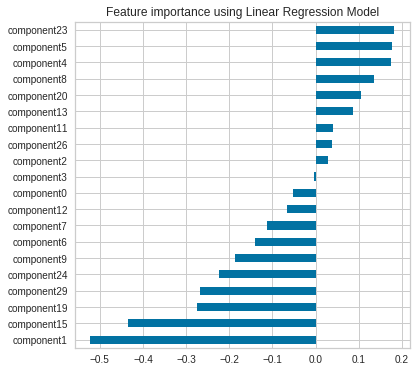

In [ ]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()[:20]
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

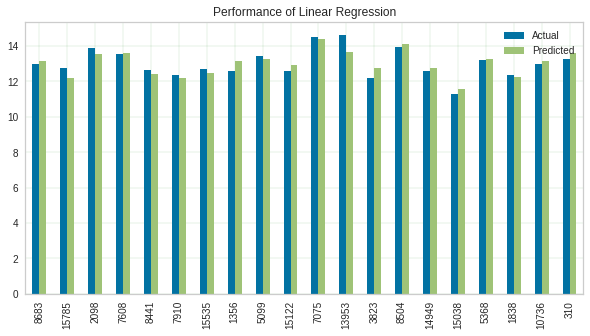

In [ ]:

#Visualization of true value and predicted
#y_pred_1.resize(1,15964)
#y_test_1 = y_test_1.values
#y_test_1.resize(1,15964)
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1},index = list(range(15964)))
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

# 3.2) Ridge regression

AttributeError: ignored

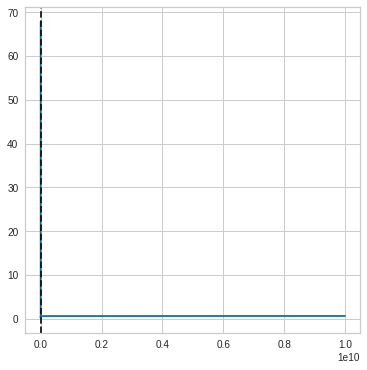

In [ ]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [ ]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [ ]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0008296277160131623
Root MSLE : 0.028803258774193628
R2 Score : 0.7480059359358244 or 74.8006%


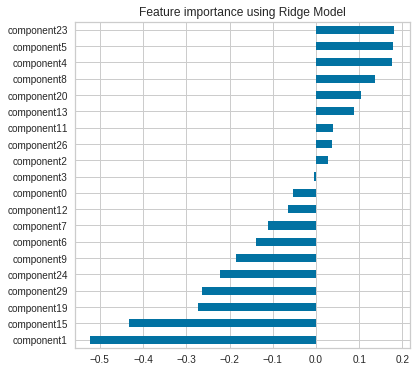

In [ ]:

#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()[:20]
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

# 3.3) Lasso Regression

In [ ]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)


In [ ]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0008296391462562539
Root MSLE : 0.028803457192779026
R2 Score : 0.7480043435222077 or 74.8004%


# 3.4) KNN

In [ ]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.028530211062190107
K = 2  , Root MSLE = 0.025865023861591455
K = 3  , Root MSLE = 0.025218527777965356
K = 4  , Root MSLE = 0.025012550242902068
K = 5  , Root MSLE = 0.024951468607030357
K = 6  , Root MSLE = 0.02487108479519246
K = 7  , Root MSLE = 0.02484915402807498
K = 8  , Root MSLE = 0.0248741450101456
K = 9  , Root MSLE = 0.02488813947551124


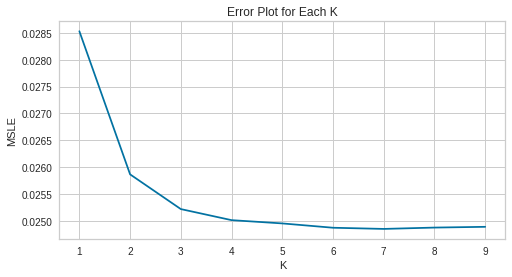

In [ ]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [ ]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=7) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [ ]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0006174804559109952
Root MSLE : 0.02484915402807498
R2 Score : 0.8140894906068352 or 81.4089%


In [ ]:
accu.to_csv('errors.csv')

# 5) Random Forest

In [ ]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.00042425836080110037
Root MSLE : 0.020597532881418114
R2 Score : 0.8755101409246854 or 87.551%


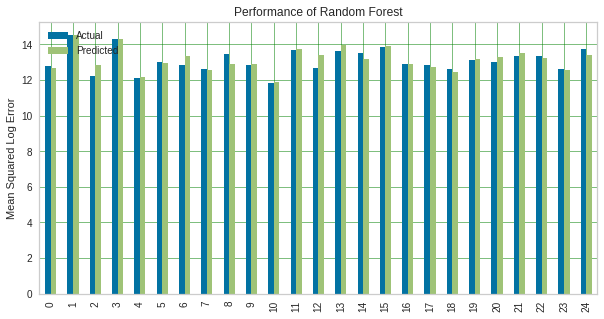

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

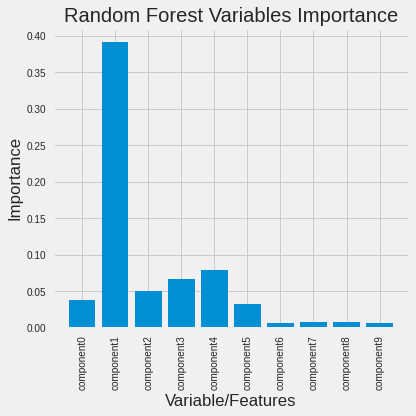

In [ ]:
importances=RFR.feature_importances_[:10]
features=X_train.columns[:10]

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

# 6) Bagging Regressor

In [ ]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [ ]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0007078796464229575
Root MSLE : 0.02660600771297636
R2 Score : 0.7907757333730026 or 79.0776%


In [ ]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

# 7) Adaboost

In [ ]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [ ]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0004963245099017696
Root MSLE : 0.022278341722439074
R2 Score : 0.8538308702150113 or 85.3831%


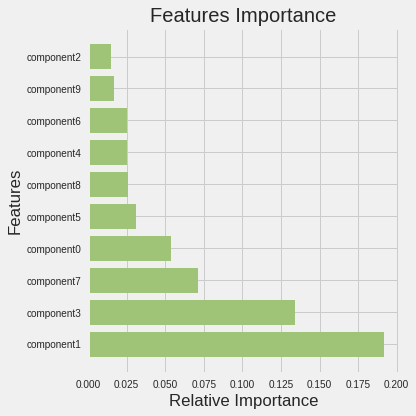

In [ ]:
importances=ABR.feature_importances_[:10]
features=X_train.columns[:10]

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [ ]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')


# 8) XGBOOST

In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [ ]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005124790070580095
Root MSLE : 0.022637999184071226
R2 Score : 0.8495066505066736 or 84.9507%


In [ ]:
"""import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()""";

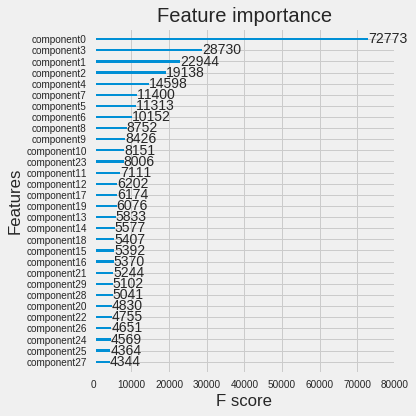

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [ ]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

In [ ]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.000830,0.000830,0.000830,0.000617,0.000424,0.000708,0.000496,0.000512
Root MSLE,0.028803,0.028803,0.028803,0.024849,0.020598,0.026606,0.022278,0.022638
R2 Score,0.748011,0.748006,0.748004,0.814089,0.875510,0.790776,0.853831,0.849507
Accuracy(%),74.801100,74.800600,74.800400,81.408900,87.551000,79.077600,85.383100,84.950700


In [ ]:
model_accuracy=accu.loc['Accuracy(%)']

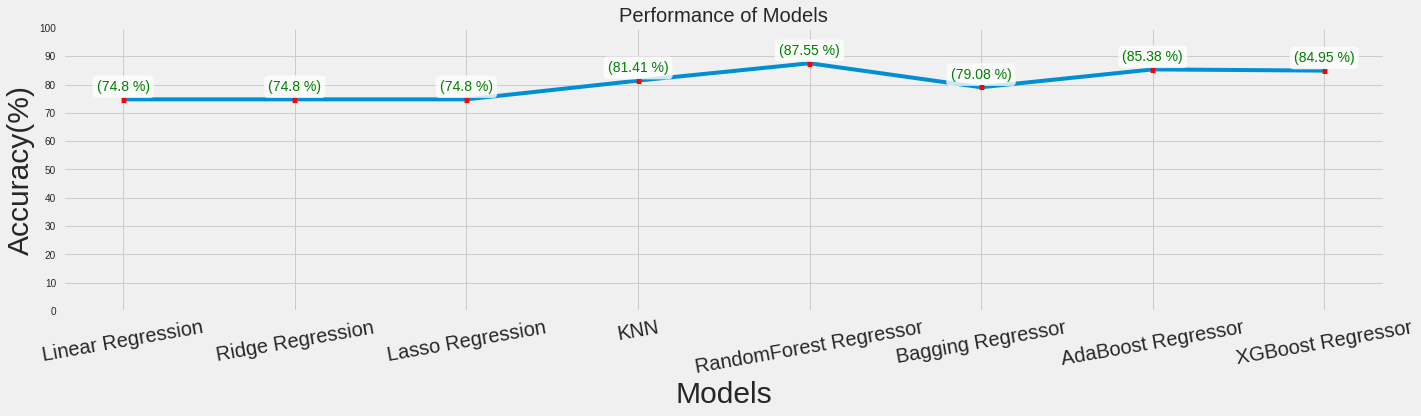

In [ ]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();